<a href="https://colab.research.google.com/github/StefanoSassy/Introduccion-al-Maching-Learning-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maching Learning
## Aprendizaje supervisado
### Regresión lineal.

Empecemos con un ejemplo de en que tipo de casos aplicar regresión lineal. Vamos a descargar una base de datos sobre el precio de las viviendas en Boston (2022).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston" #Página donde estamos extrayendo los datos.
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Convertir a formato adecuado
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Crear un DataFrame
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=column_names)
df["MEDV"] = target #Esto es un ejemplo de como agregar una columna en el data frame.
print(df) #La base de datos entera.
print(df.columns) #Información resumida por las columnas.


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

La idea es encontrar los datos que están más relacionados con respecto al precio de las casas, visualizar dichas relaciones, aplicar regresión lineal (después de visualizar) para predecir los precios futuros que mejor se ajustan a los datos. Para ello empezamos usando la descripción de los datos.

In [2]:
boston_descr = """
Boston Housing Dataset:
Este dataset contiene información sobre viviendas en Boston y fue recopilado por el U.S. Census Service en 1978.
El objetivo original era estudiar el impacto de la contaminación en los precios de las viviendas.

Características:
1. CRIM: Tasa de criminalidad per cápita por ciudad.
2. ZN: Proporción de terrenos residenciales para lotes grandes.
3. INDUS: Proporción de acres comerciales no minoristas por ciudad.
4. CHAS: Variable ficticia de Charles River (1 si está cerca del río, 0 si no).
5. NOX: Concentración de óxidos de nitrógeno (ppm).
6. RM: Número promedio de habitaciones por vivienda.
7. AGE: Proporción de viviendas ocupadas por propietarios construidas antes de 1940.
8. DIS: Distancia ponderada a cinco centros de empleo en Boston.
9. RAD: Índice de accesibilidad a autopistas radiales.
10. TAX: Tasa del impuesto a la propiedad por cada \$10,000.
11. PTRATIO: Relación alumno-profesor por ciudad.
12. B: 1000(Bk - 0.63)^2, donde Bk es la proporción de residentes afroamericanos por ciudad.
13. LSTAT: % de la población con bajos ingresos.
14. MEDV: Valor medio de las viviendas ocupadas por sus dueños en \$1000.

Fuente: http://lib.stat.cmu.edu/datasets/boston
"""

In [3]:
target = df["MEDV"].values  # Convertir con NumPy en array (matriz). Nuestro objetivo a analizar es el precio.
print(target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Checamos que los datos estén "limpios".

In [4]:
df.info() #Checar el tipo de dato y si la tabla no tiene valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Matriz de covarianzas.

La matriz de covarianzas nos dice como están relacionados los datos linealmente y suponiendo que las variables aleatorias respetan una distribución normal. El cálculo es el siguiente: supongamos que tenemos tres variables $X_1$, $X_2$ y $X_3$ con cinco observaciones cada una:

\begin{array}{|c|c|c|c|}
\hline
\text{Observación} & X_1 & X_2 & X_3 \\
\hline
1 & 2 & 3 & 10 \\
2 & 4 & 5 & 7 \\
3 & 6 & 2 & 6 \\
4 & 8 & 8 & 5 \\
5 & 10 & 7 & 2 \\
\hline
\end{array}

Calculamos las medias de cada variable con la siguiente fórmula

$$\mu_{X_i}=\frac{1}{n}\sum_{k=1}^n X^{(k)}_i.$$

\begin{array}{lccl}
         \mu_{X_1} =& \frac{1}{5}(2+4+6+8+10) = 6, &  \\
         \mu_{X_2} =& \frac{1}{5}(3+5+2+8+7) =  5,&  \\
         \mu_{X_3} =& \frac{1}{5}(10+7+6+5+2) = 6. & \\
      \end{array}

Ahora calculamos las desviaciones estandar con la fórmula:
$$
\sigma_{X_i} = \sqrt{\frac{1}{n} \sum_{k=1}^{n} \left( X_i^{(k)} - \mu_{X_i} \right)^2}.
$$

\begin{array}{lccl}
         \sigma_{X_1} =& \sqrt{\frac{1}{5}(16+4+0+4+16)} = \sqrt{8}, &  \\
         \sigma_{X_2} =& \sqrt{\frac{1}{5}(4+0+9+9+4)} =  \sqrt{26/5}, &  \\
         \sigma_{X_3} =& \sqrt{\frac{1}{5}(16+1+0+1+16)} = \sqrt{34/5}. & \\
      \end{array}
Calculamos las covarianzas con la fórmula:
$$
\text{cov}(X_\alpha,X_\beta)=\frac{1}{n}\sum(X_\alpha^{(k)}-\mu_{X_\alpha})(X_\beta^{(k)}-\mu_{X_\beta}).
$$

\begin{array}{lccl}
         \text{cov}(X_1,X_2) =& \frac{22}{5}, &  \\
         \text{cov}(X_1,X_3) =& \frac{-36}{5}, &  \\
         \text{cov}(X_2,X_3) =& \frac{-19}{5}. & \\
      \end{array}
Calculamos los coeficientes de correlación:
$$r_{ij}=\frac{\text{cov}(X_i,X_j)}{\sigma_{X_i}\sigma_{X_j}}.$$

\begin{array}{lccl}
         r_{12} \approx & 0.683, &  \\
         r_{13} \approx & -0.976, &  \\
         r_{23} \approx & -0.639. & \\
      \end{array}
Finalmente acomodamos todo en la matriz de covarianzas, que está dada por
$$R =
\begin{bmatrix}
1 & r_{12} & r_{13} \\
r_{21} & 1 & r_{23} \\
r_{31} & r_{32} & 1
\end{bmatrix}=\begin{bmatrix}
1 & 0.683 & -0.976 \\
0.683 & 1 & -0.639\\
-0.976 & -0.639 & 1.
\end{bmatrix}$$

Todas estás cuentas las hará el código Python, y finalmente usaremos la libreria mathplot.

In [5]:
corr = df.corr() #Este código simple encuentra la matriz de covarianzas o matriz de correlaciones.
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Veamos un *mapa de color* de la matriz.  

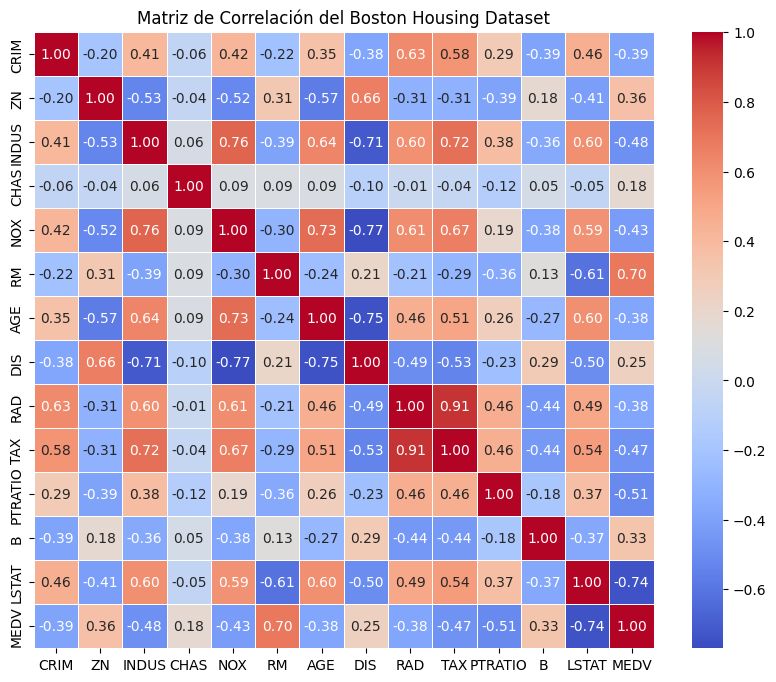

In [6]:
import seaborn as sns #Esta libreria sirve para dar color al mapa de calor.

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Boston Housing Dataset")
plt.show()

El siguiente código muestra:
1.   cuales son los nombres de las columnas más relacionadas con el precio de la vivienda,
2.   cuales son los valores mas grandes (en valor absoluto) más grandes que encontra al generar la matriz de covarainzas.



In [7]:
print(df.corr().abs().nlargest(3, 'MEDV').index)
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


La siguiente gráfica muestra los puntos $(x,y)$ done $x$ es el valor LSTAT: % de la población con bajos ingresos y $y$ el precio de las viviendas MEDV.

Text(0, 0.5, 'MEDV')

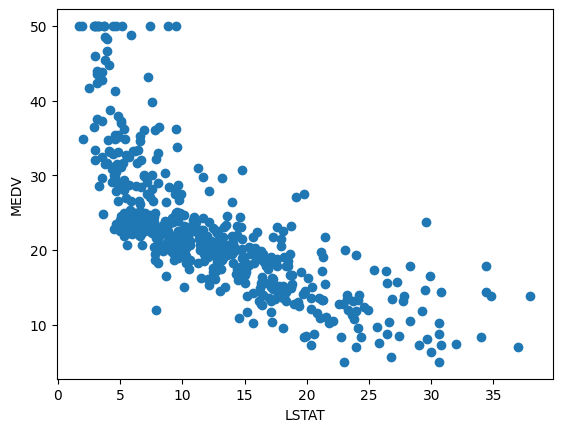

In [8]:
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

La siguiente gráfica muestra los puntos  (x,y)  done  x  es el valor RM: Número promedio de habitaciones por vivienda y $y$  el precio de las viviendas MEDV.

Text(0, 0.5, 'MEDV')

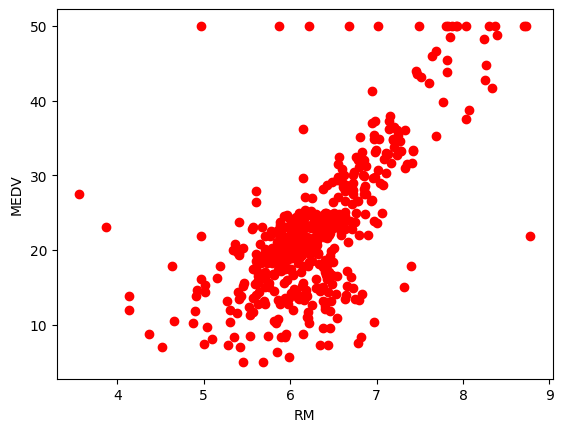

In [9]:
plt.scatter(df['RM'], df['MEDV'], marker='o', c='red')
plt.xlabel('RM')
plt.ylabel('MEDV')

La siguiente gráfica muestra los puntos (x,y) done x es el valor  LSTAT, $y$ el valor RM y $z$ MEDV.

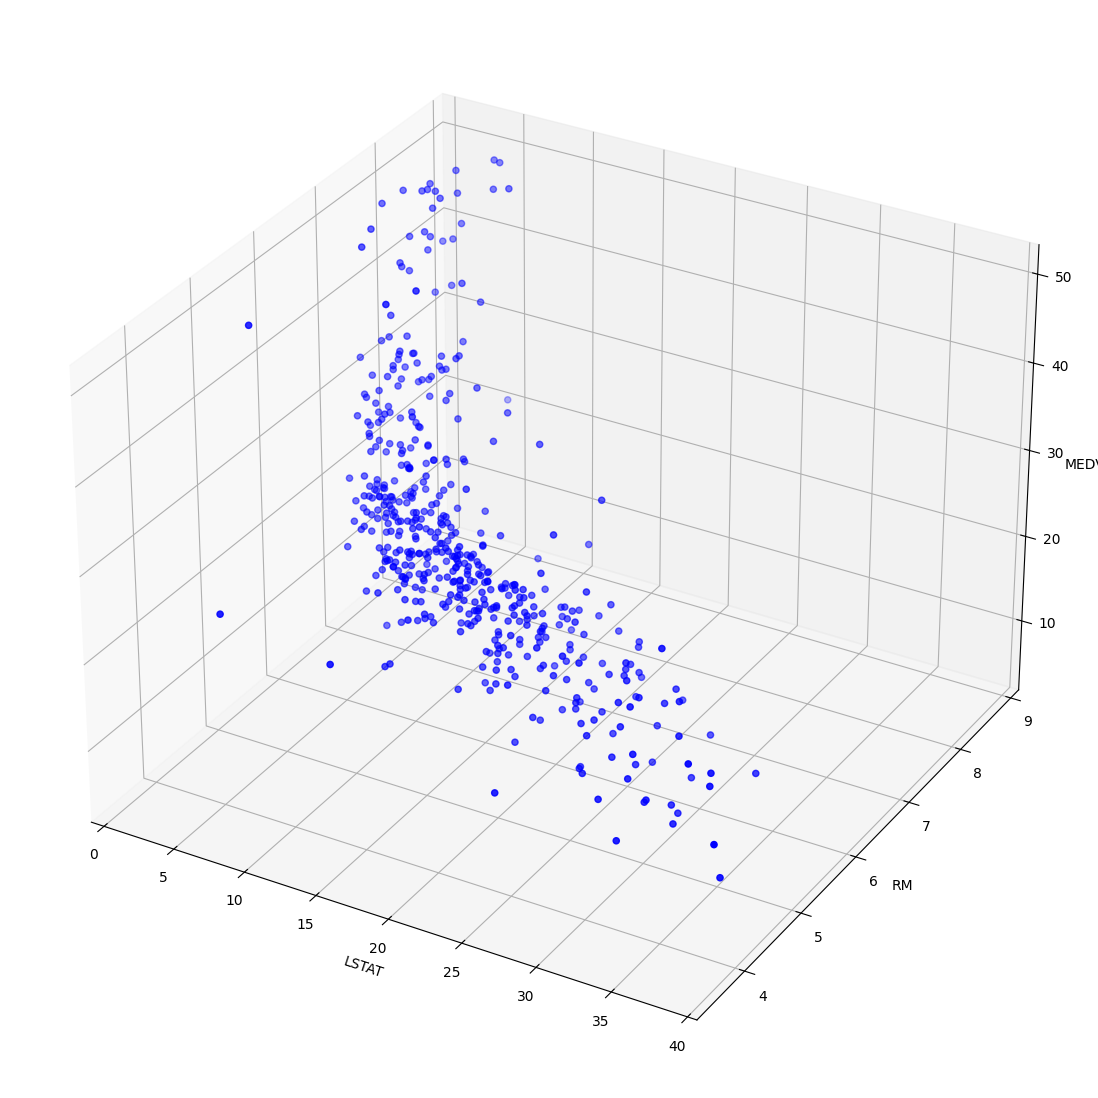

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
df['RM'],
df['MEDV'],
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

#Método de mínimos cuadrados

Supongamos que tenemos una cantidad $m$ de datos $(x_1,y_y),\dots, (x_m,y_m)$ acomodados como en cualquiera de las gráficas anteriores. Nos gustaría encontrar un polinomio que aproxime a los valor de los puntos para predecir el siguiente valor del experimento.

Empezamos con una recta $y=mx+b$ (polinomio de grado 1) ¿Cómo se elige la recta correcta o la mejor recta que aproxima dichos datos? Si minimizamos la distancia de los puntos a nuestra recta podemos minimizar el "error".

Empecemos con la distancia de dos puntos en el plano $P=(x_1,y_1)$ y $Q=(x_2,y_2)$, que está dada por la fórmula:

$$ d(P,Q)=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}.$$

En este caso, si el punto $P$ esta sobre la recta que queremos calcular, entonces tiene por coordenadas $P=(x,cx+d)$, así, cada una de las distancias que queremos calcular están dados por las distancias

$$d_i(P,Q)=\sqrt{(x_i-x_i)^2+(y_i-(mx_i+b))^2}=\sqrt{(y_i-(mx_i+b))^2}=|(y_i-(mx_i+b))|,$$

$$d^2_i(P,Q)=(y_i-(mx_i+b))^2.$$

Recordemos que los valores $x_i$ y $y_i$ los conocemos, es decir, nuestras incognitas son $m$, $b$.

El método de mínimos cuadrados busca minimizar el "error"
$$E=\sum_{i=1}^md_i^2=\sum_{i=1}^m(y_i-mx_i-b)^2.$$

Para aproximar los datos por una parábola basta tomar $y=ax^2+bx+c$ y el error se ve como:
$$ E=\sum_{i=1}^m(y_i-ax_i^2-bx_i-c)^2.$$

Para aproximar los datos para cualquier polinomio tendríamos que
$$E=\sum_{i=1}^m(y_i-a_nx^n_i-a_{n-1}x^{n-1}_i-\cdots-a_2x^2_i-a_1x_i-a_0)^2$$

Independientemente de los coeficientes que buscamos minimizar, la función $E:\mathbb{R}^{n+1}\rightarrow \mathbb{R}^{+}\cup \{0\}$ siempre es positiva y diferenciable, lo que nos permite calcular los mínimos de una función de este estilo usando el determinante de la matriz hessiana para buscar los ceros de dicho determinante:
$$
H(E) = \begin{pmatrix}
\frac{\partial^2 E}{\partial a_n^2} & \frac{\partial^2 E}{\partial a_n \partial a_{n-1}} & \cdots & \frac{\partial^2 E}{\partial a_n \partial a_0} \\
\frac{\partial^2 E}{\partial a_{n-1} \partial a_n} & \frac{\partial^2 E}{\partial a_{n-1}^2} & \cdots & \frac{\partial^2 E}{\partial a_{n-1} \partial a_0} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 E}{\partial a_0 \partial a_n} & \frac{\partial^2 E}{\partial a_0 \partial a_{n-1}} & \cdots & \frac{\partial^2 E}{\partial a_0^2}
\end{pmatrix}_{(n+1)\times (n+1)}
$$

Afortunadamente, el álgebra lineal nos ayuda a mejorar el procedimiento, redefiniendo a $E=||y-A\kappa||^2$ donde:
$$A =\begin{pmatrix}
x_1^n & x_1^{n-1} & \cdots & x_1 & 1\\
x_2^n & x_2^{n-1} & \cdots & x_2 & 1\\
\vdots & \vdots & \ddots & \vdots  & \vdots\\
x_m^n & x_m^{n-1} & \cdots & x_m & 1
\end{pmatrix}_{m\times (n+1)} \quad y=\begin{pmatrix}y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}_{m\times 1}
\quad \text{y} \quad \kappa = \begin{pmatrix}a_n \\ a_{n-1}\\ \vdots \\ a_1 \\ a_0 \end{pmatrix}_{(n+1)\times 1}$$
Además del siguiente teorema:

**Teorema.-** Sean $A_{m \times {(n+1)}}$ y $y\in \mathbb{R}^m$. Entonces exite $\kappa_0 \in \mathbb{R^{n+1}}$ tal que
$$(A^*A)\kappa_0=A^*y \quad \text{y} \quad ||y-A\kappa_0||\leq||y-A\kappa||\;\; \forall κ \in \mathbb{R}^{n+1}.$$
Más aun, si $\text{rang}(A)=n+1 \Rightarrow \kappa_0=(A^*A)^{-1}A^*y.$

**Nota** En este caso, aunque se esta usando la matriz adjunta $A^*$, como nuestras matrices de datos tiene entradas reales, resulta que $A^*=A^t$ la transpuesta. Esto quiere decir que gracias a los ejemplos que ya vimos de como calcular la matriz transpuesta, multiplicación de matrices y el algoritmo de Gauss-Jordan, podríamos generar un código para entrenar al programa y realizar regresión lineal.  


Mounted at /content/drive


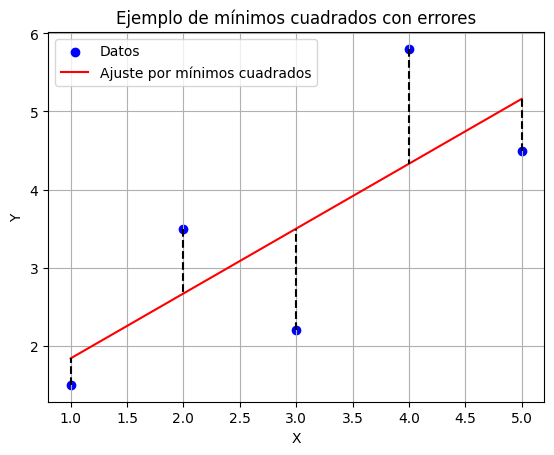

In [11]:
from google.colab import drive #Este código es un ejemplo de como conectarse a google Drive e insertar una imagen.
drive.mount('/content/drive', force_remount=True)

from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/mc.png')

Antes de continuar veamos un ejemplo de las cuentas a realizar y como nos ayuda el teorema. Supongamos que la colección de datos es $(1,2),\,(2,3),\, (3,5)$ y $(4,7)$. Entonces
$$A =\begin{pmatrix} 1 & 1\\ 2 & 1\\ 3 & 1\\ 4 & 1
\end{pmatrix}_{4\times 2}\quad \text{y} \quad y= \begin{pmatrix} 2 \\ 3 \\ 5 \\ 7  \end{pmatrix}_{4\times 1}; $$
así
$$A^tA=\begin{pmatrix} 1 & 2 & 3 & 4\\ 1 & 1 & 1 & 1 \end{pmatrix}\begin{pmatrix} 1 & 1\\ 2 & 1\\ 3 & 1\\ 4 & 1
\end{pmatrix}= \begin{pmatrix} 30 & 10 \\ 10 & 4  \end{pmatrix}.$$
Con lo cual
$$(A^tA)^{-1}=\frac{1}{20}\begin{pmatrix} 4 & -10 \\ -10 & 30  \end{pmatrix}.$$
Entonces,
$$\begin{pmatrix} m  \\ b  \end{pmatrix}=\kappa_0=\frac{1}{20}\begin{pmatrix} 4 & -10 \\ -10 & 30  \end{pmatrix}\begin{pmatrix} 1 & 1\\ 2 & 1\\ 3 & 1\\ 4 & 1
\end{pmatrix}\begin{pmatrix} 2 \\ 3 \\ 5 \\ 7  \end{pmatrix}=\begin{pmatrix} 1.7  \\ 0  \end{pmatrix}.$$

Se sigue que la recta $y=1.7x$ es la minima recta de cuadrados. Por lo tanto $$E=||y-A\kappa_0||^2=0.3.$$

El ejemplo que estamos trabajando sobre las viviendas, no estamos buscando una recta sino un plano $z=ax+by+c$, lo que hace cambiar el cálculo del error a:
$$E=\sum_{i=1}^m(z_i-ax_i-by_i-c)^2=||z-A\kappa||^2,$$
con
$$ z=\begin{pmatrix}z_1 \\ z_2 \\ \vdots \\ z_m \end{pmatrix}, \quad A= \begin{pmatrix} x_1 & y_1 & 1\\ x_2 & y_2 & 1\\ \vdots & \vdots & \vdots \\ x_m & y_m & 1 \end{pmatrix} \quad \text{y} \quad \kappa=\begin{pmatrix} a \\ b \\ c \end{pmatrix}.$$


# Entrenando el Modelo.

Vamos a separar los datos con 70% para entrenar y 30% para corrovorar. Esto nos asegura que si entran nuevos datos que el modelo no hayamos incluido o se vayan a incluir después, el modelo puede reajustar y "aprender". No se recomienda ingresar el 100% de los datos porque el modelo podría "memorizar" el compartamiento en vez de ajustar cada que se ingresan nuevos datos.

In [12]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM']) #Variables predictorias
Y = df['MEDV'] #Objetivo
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
random_state=5) #Los datos para la prueba son siempre los mismos.

Un paréntesis para checar que hace el apartado radom_state. Más que otra cosa sirve para "fijar" el modelo y poder compartirlo.

In [13]:
# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

# División SIN random_state (cambia cada vez que ejecutas)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.3)
print("🔹 División SIN random_state:")
print("Entrenamiento:", X_train1)
print("Prueba:", X_test1)

# División CON random_state=5 (siempre la misma)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.3, random_state=5)
print("\n🔹 División CON random_state=5:")
print("Entrenamiento:", X_train2)
print("Prueba:", X_test2)

🔹 División SIN random_state:
Entrenamiento: [2 5 4 7 1 9 6]
Prueba: [ 3 10  8]

🔹 División CON random_state=5:
Entrenamiento: [5 8 2 1 9 7 4]
Prueba: [10  6  3]


In [14]:
print(x_train.shape) #Muestra el tamaño de los datos que se entrenan.
print(Y_train.shape)

(354, 2)
(354,)


In [15]:
print(x_test.shape) #Muestra el tamaño de los datos de prueba.
print(Y_test.shape)

(152, 2)
(152,)


Vamos a entrenar, para ello usamos la paquetería LinearRegression. Una vez entrenado el modelo hacemos algunas predicciones.  

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [17]:
price_pred = model.predict(x_test)
print(type(price_pred))

<class 'numpy.ndarray'>


#Error cuadrático medio (MSE)

Una vez entrenado el modelo, para conocer que "tan bien" está prediciendo los sucesos usamos el método R-cuadrado ($R^2$), también conocido como error cuadrático medio (MSE), nos permite "medir" que tan bien el aprendizaje se ajusta a regresión lineal. "Mide de la siguiente manera":
si $y$=valores reales, $\hat{y}$=valores predichos y $\bar{y}$=promedio de los valores reales. Se calcula
$$ SS_{\text{residual}}=\sum_{i=1}^k(y_i-\hat{y_i})^2, \quad SS_{\text{total}}=\sum_{i=1}^k(y_i-\bar{y}_i)^2 \quad \text{y} \quad R^2=1-\frac{SS_{\text{residual}}}{SS_{\text{total}}}.$$

Mientras mas cercano $R^2$ esté al valor $1$, mejor es el entrenamiento. Generalmente mientras mas datos hay, el valor $R^2$ mejora.

In [18]:
print('R-Squared: %.4f' % model.score(x_test,
Y_test))

R-Squared: 0.6162


Veamos la gráfica entre los valores actuales y los valores predichos. Ahora, mientras mas se ajuste a una "recta" mejor serán las predicciones.

36.49422110915324


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

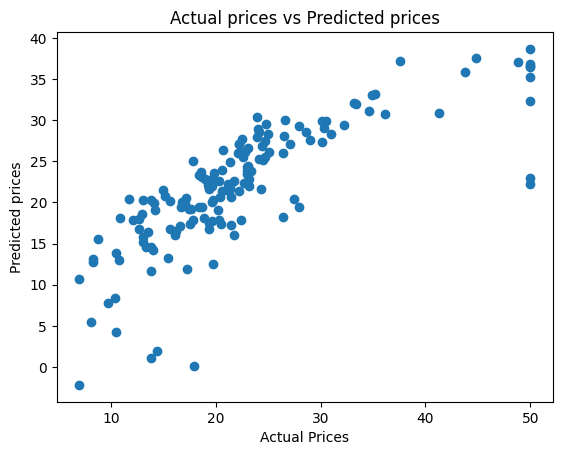

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, price_pred)
print(mse)
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

Finalmente, el modelo intenta construir un plano $z=ax+by+c$, aunque en el contexto de ML, este plano se escribe como $y=\beta_0+\beta_1 x_1+\beta_2 x_2$, donde $\beta_0$ se le conoce como **intercepto** y a los demas $\beta$'s como **coeficientes**. De lo ya modelado, veamos como obetener estos valores y como aplicarlo para predicir el valor de una casa con LSTAT de 30 y RM de 5.

In [20]:
print(model.intercept_)
print(model.coef_)
print(model.predict([[30,5]]))

0.38437936780346504
[-0.65957972  4.83197581]
[4.75686695]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


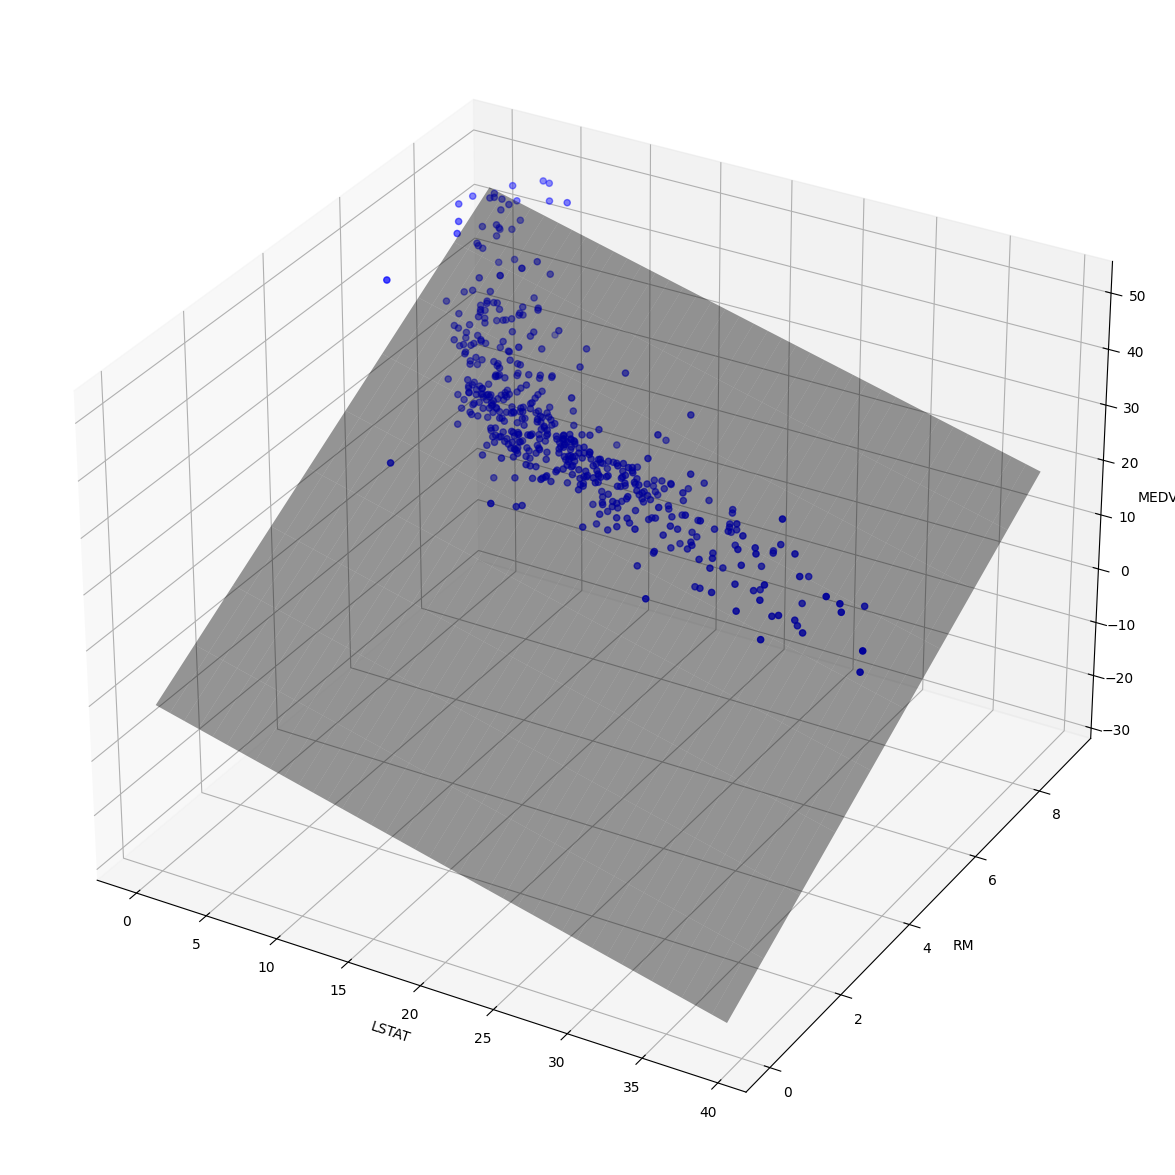

In [21]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
x['RM'],
Y,
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)
#---calculando z(MEDC) basado en el modelo---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
rstride=1,
cstride=1,
color='None',
alpha = 0.4)
plt.show()

#Maquinas de soporte vectorial (SVM)

A veces nos entregan una cantidad de datos random que están clasificados de manera Boleana (si/no, 1/0, rojo/azul, 1/-1). El método de SVM nos ayuda a predecir una clasificación para datos nuevos que se vayan incluyendo, veamos como se construye dicha predicción. Primero, veamos un ejemplo simple de dicha clasificación booleana.


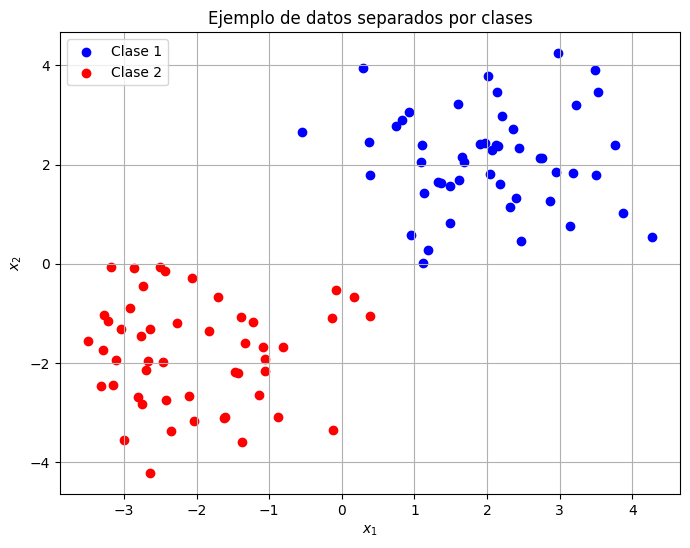

In [22]:
# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad

# Clase 1 (azul)
X_1 = np.random.randn(50, 2) + [2, 2]  # 50 puntos centrados en [2, 2]
# Clase 2 (rojo)
X_2 = np.random.randn(50, 2) + [-2, -2]  # 50 puntos centrados en [-2, -2]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X_1[:, 0], X_1[:, 1], color='blue', label='Clase 1')
plt.scatter(X_2[:, 0], X_2[:, 1], color='red', label='Clase 2')

# Personalización
plt.title('Ejemplo de datos separados por clases')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()

La gráfica anterior muestra un conjunto de datos separados por colores, el problema es que Python y en general los lenguajes de programación "no entienden colores". Para darle la vuelta a este problema, encajamos los puntos en $\mathbb{R}^3$ dandoles a los azules altura 1 y a los rojos altura -1. Esto solo es una representación visual de los datos y como separarlos de manera booleana, entonces quedemonos con la figura en 2D (plano). Supongamos que queremos un "divisor" una curva o figura que separe los datos que vayamos ingresando con un mínimo de error perdictivo.

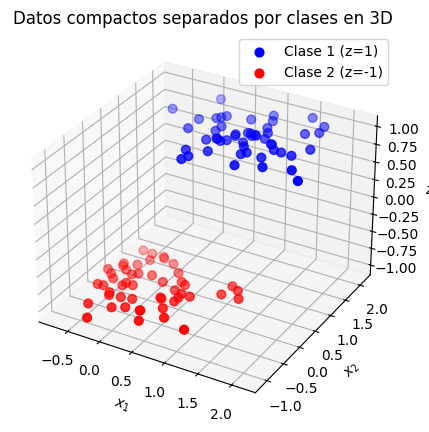

In [23]:
# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad

# Clase 1 (azul, z=1)
X_1 = 0.5 * np.random.randn(50, 2) + [1, 1]  # 50 puntos más juntos centrados en [1, 1]
Z_1 = np.ones(50)  # Altura z=1

# Clase 2 (rojo, z=-1)
X_2 = 0.5 * np.random.randn(50, 2) + [0, 0]  # 50 puntos más juntos centrados en [-1, -1]
Z_2 = -np.ones(50)  # Altura z=-1

# Crear el gráfico 3D
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos con escala más reducida
ax.scatter(X_1[:, 0], X_1[:, 1], Z_1, color='blue', label='Clase 1 (z=1)', s=40)  # s ajusta el tamaño del punto
ax.scatter(X_2[:, 0], X_2[:, 1], Z_2, color='red', label='Clase 2 (z=-1)', s=40)

# Personalización
ax.set_title('Datos compactos separados por clases en 3D')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$z$')
ax.legend()
plt.show()

#Teoria sobre SVM

La idea es encontrar el plano o figura que mejor clasifica dichos datos.



#Truco del Kernel (Kernel Trick)


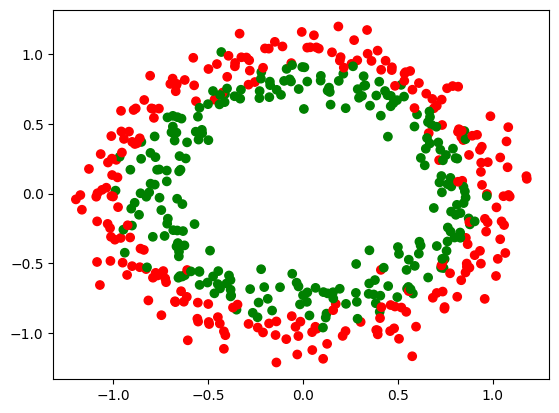

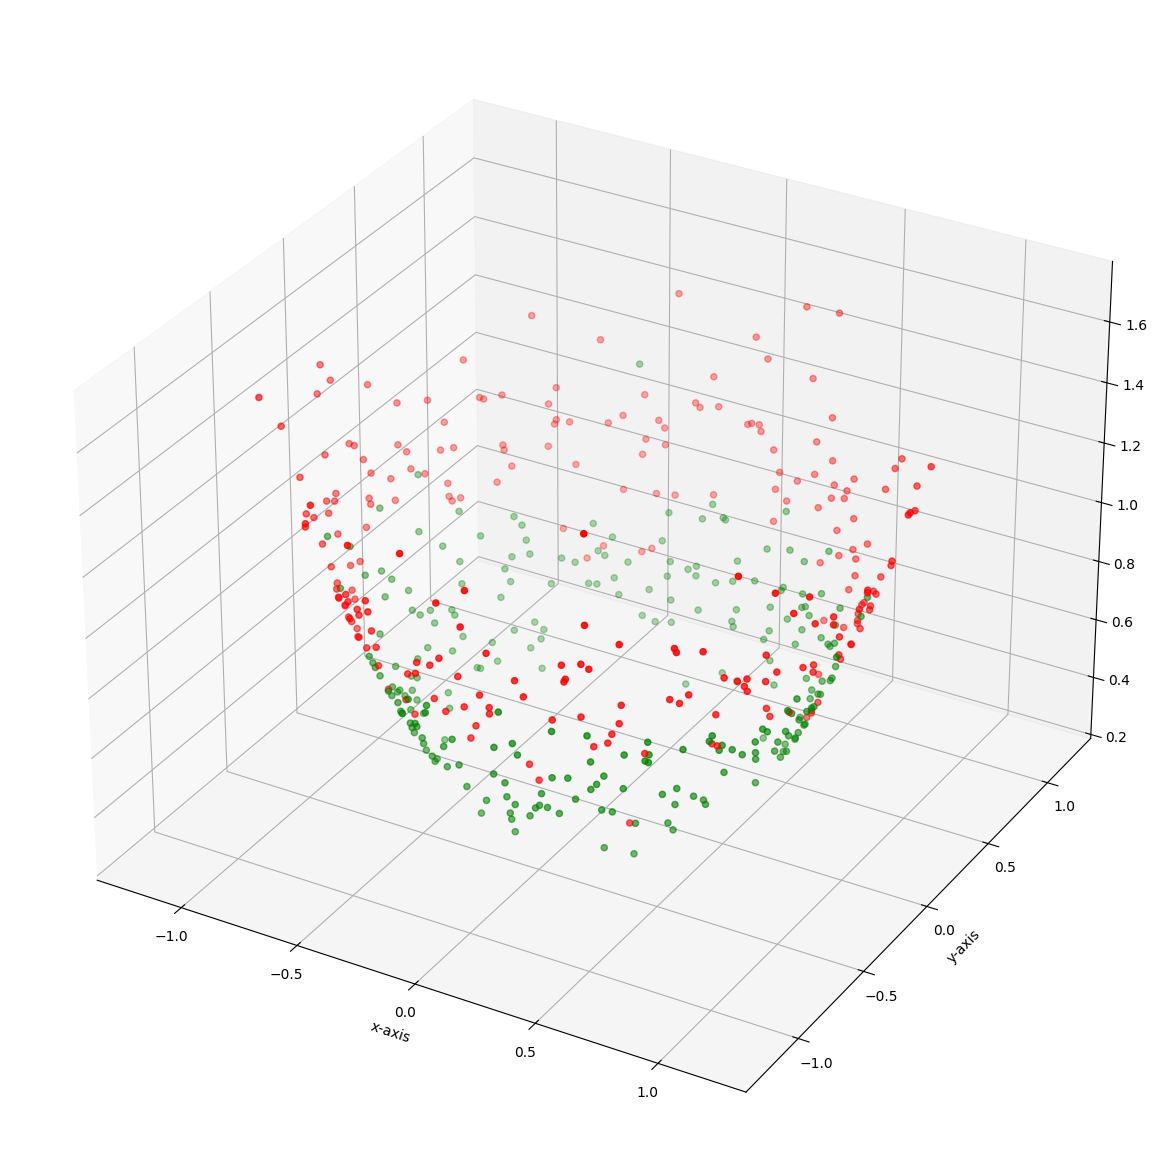

In [24]:
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [25]:
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)

SVC(kernel='linear')

In [26]:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) /clf.coef_[0][2]

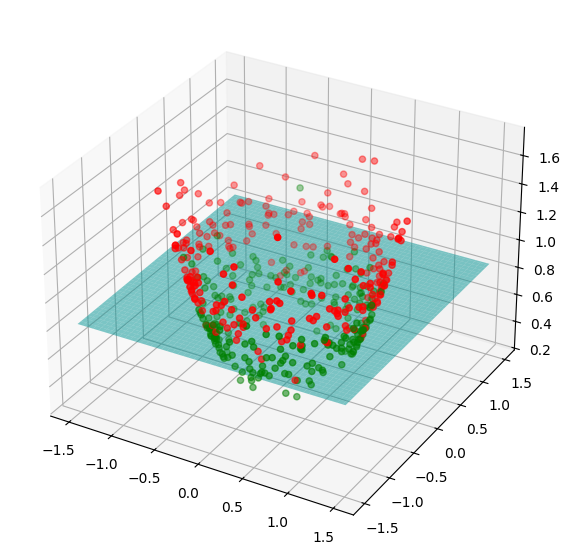

In [27]:
# Crear una nueva figura para la superficie
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])

# Definir el plano separado por SVM
x3 = lambda x, y: (-clf.intercept_[0] - clf.coef_[0][0] * x - clf.coef_[0][1] * y) / clf.coef_[0][2]

# Crear malla de puntos
tmp = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(tmp, tmp)

# Graficar el plano
ax.plot_surface(x, y, x3(x, y), color='c', alpha=0.5)

plt.show()